# Importing Libraries

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.preprocessing import StandardScaler


# Importing Data-set


In [4]:
df=pd.read_csv("D:\Project\CodeSoft\CUSTOMER-CHURN\Churn_Modelling.csv")
df.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [10]:
col=df.columns
print("Columns:",col)

Columns: Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


# Data PreProcessing


**Checking for null values & duplicated values**

In [18]:
df.isnull().sum().sum()

0

In [21]:
df.duplicated().sum()

0

NO NULL VALUES FOUND
NO DUPLICATE VALUES

**Dropping Unnecessary Columns**

RowNumber, CustomerID, Surname are unique.

In [23]:
df.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1,inplace=True)

In [24]:
df.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


# Visualization

No. of people who exited

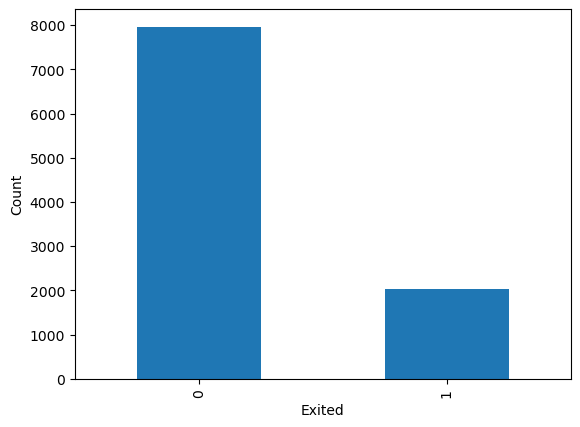

In [25]:
df['Exited'].value_counts().plot(kind='bar')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.show()

No of people who exited with respect to geography, gender, IsActiveMember & HasCrCard

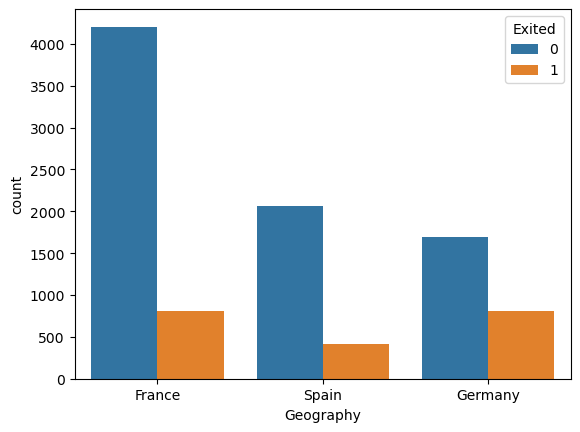

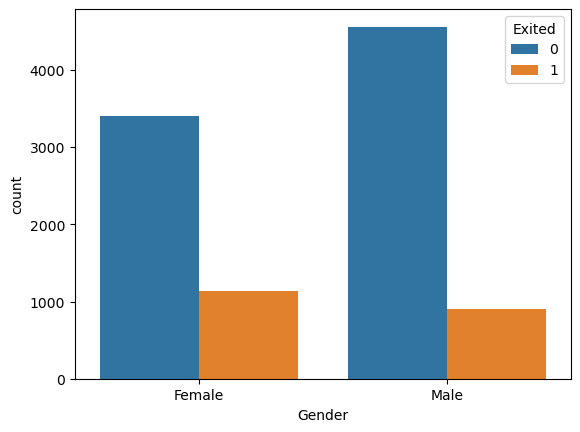

In [30]:
sns.countplot(x='Geography',hue='Exited',data=df)
plt.show()

sns.countplot(x='Gender',hue='Exited',data=df)
plt.show()

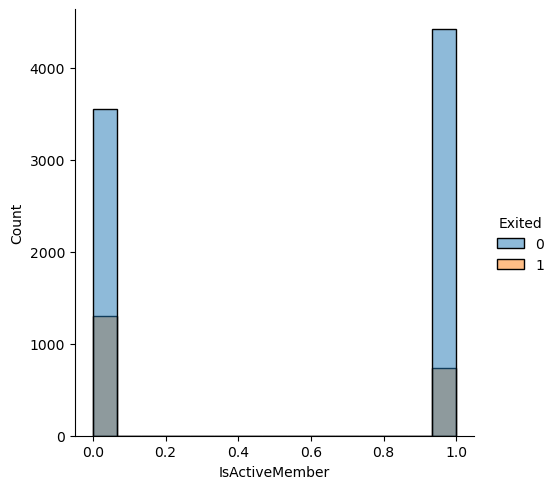

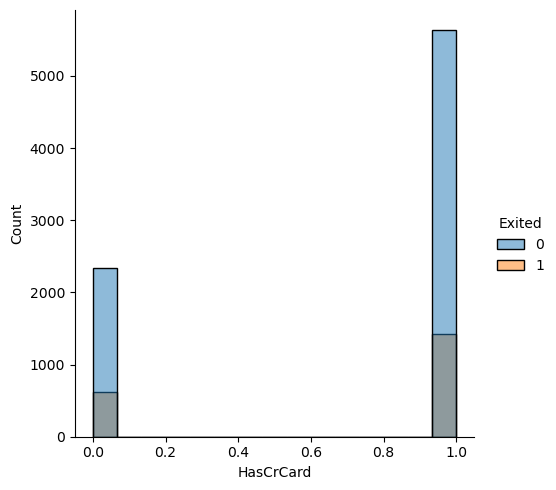

In [34]:
sns.displot(x='IsActiveMember',hue='Exited',data=df)
plt.show()

sns.displot(x='HasCrCard',hue='Exited',data=df)
plt.show()

# Encoding the Categorical Data

In [36]:
print(df['Geography'].unique())
df['Geography'].value_counts()

['France' 'Spain' 'Germany']


France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [37]:
print(df['Gender'].unique())
df['Geography'].value_counts()

['Female' 'Male']


France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [38]:
df = pd.get_dummies(df, columns=['Gender','Geography'])

In [43]:
new_col=list(df.columns)
print("Columns:",new_col)

Columns: ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'Gender_Female', 'Gender_Male', 'Geography_France', 'Geography_Germany', 'Geography_Spain']


In [44]:
df.head(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,1,0,0


# Splittig Data for Training and Testing

In [49]:
X=df.drop(columns=['Exited'])
Y=df['Exited']

In [46]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

**Checking the dimensions of data**

In [50]:
print("X:",np.shape(X))
print("Y:",np.shape(Y))

X: (10000, 13)
Y: (10000,)


In [54]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)
#test_size 0.2 means 20% test data and 80% training data

In [52]:
logistic_regression= LogisticRegression()
random_forest = RandomForestClassifier(n_estimators=50, random_state=2)
gradient_boosting = GradientBoostingClassifier(n_estimators=50,random_state=2)

**Model-Fitting**

In [58]:
#Logistic Regression
logistic_regression.fit(X_train,Y_train)

LogisticRegression()

In [59]:
#RandomForestClassifier
random_forest.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=50, random_state=2)

In [60]:
#GradientBoostingClassifie
gradient_boosting.fit(X_train,Y_train)

GradientBoostingClassifier(n_estimators=50, random_state=2)

In [75]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred),"\n")
    print("precision_score:", precision_score(y_test, y_pred))
    print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Evaluate Logistic Regression
print("Logistic Regression:")
evaluate_model(logistic_regression,X_test,Y_test)

# Evaluate Random Forest
print("\nRandom Forest:")
evaluate_model(random_forest,X_test,Y_test)

# Evaluate Gradient Boosting
print("Gradient Booasting:")
evaluate_model(gradient_boosting, X_test, Y_test)




Logistic Regression:
Confusion Matrix:
 [[1584   33]
 [ 368   15]] 

precision_score: 0.3125
Accuracy Score: 0.7995

Random Forest:
Confusion Matrix:
 [[1555   62]
 [ 227  156]] 

precision_score: 0.7155963302752294
Accuracy Score: 0.8555
Gradient Booasting:
Confusion Matrix:
 [[1575   42]
 [ 228  155]] 

precision_score: 0.7868020304568528
Accuracy Score: 0.865


# Final Model
**Precision & Accuracy of Gradient Boosting is high as compared to other.**

In [79]:
final_model=gradient_boosting
Y_pred = final_model.predict(X_test)

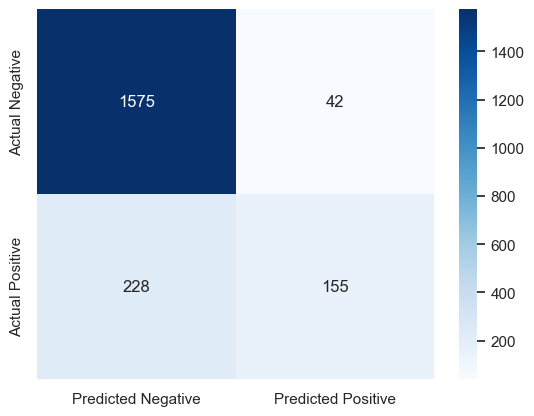

In [80]:
matrix=confusion_matrix(Y_test, Y_pred)

sns.set(font_scale=1)  # Adjust the font size as needed
sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Predicted Negative", "Predicted Positive"],
                yticklabels=["Actual Negative", "Actual Positive"])

plt.show()
